## **PIS - Vježba 2.1: Analiza ekonomske izvedivosti**

Zadatak se temelji na analizi ekonomske izvedivosti nekog IT projekta.
<br/>**<u>Implementirajte</u>** funkcije za izračun ključnih ekonomskih pokazatelja koje nedostaju.

⚠️ = ćeliju je **potrebno dopuniti** <br/>
✅ = ćelija je već implementirana, treba samo pokrenuti <br/>
❓ = nadopuniti ćeliju pitanja sa odgovorima

Cilj istraživanja ekonomske izvedivosti je utvrditi da li je ekonomski isplativo realizirati predloženi projekt. Prvi korak u analizi ekonomske izvedivosti je **identifikacija svih troškova i prihoda** i određivanje njihovih vrijednosti (ili procjena).

Troškovi i prihodi se obično dijele u četiri grupe:
- **Troškovi razvoja** (npr. plaće programera)
- **Troškovi rada** (npr. softverske licence, održavanje hardvera)
- **Materijalni prihodi** (npr. porast prodaje, smanjenje troškova koje nastaje kao rezultat uvođenja sustava)
- **Nematerijalni prihodi** (npr. porast zadovoljstva kupaca)



#### Bitni proračuni u analizi ekonomske izvedivosti
* **Kumulativna dobit**
  * proračun cjelokupnog toka novca tijekom trajanja projekta
  * `Kumulativna dobit ove godine = Kumulativna dobit prošle godine + Dobit ove godine`

* **Povrat investicije (ROI – Return on Investment ili ROR – Rate of Return)**
  * ROI mjeri prosječno vraćanje postotka novca uloženog u projekt (tj. dobit projekta), što je veći ROI znači da dobitak brže nadmaši trošak
  * `ROI = (Ukupni prihodi - Ukupni troškovi) / (Ukupni troškovi)`

* **Poravnanje vrijednosti ili točka pokrića (BEP, Break-Even point)**
  * trenutak u vremenu kada se troškovi projekta izjednače s prihodom projekta
  * kaže nam koliko vremena je potrebno da zarada projekta bude jednaka uloženom novcu
  * obično, projekt je riskantniji što mu duže treba da izjednači troškove i zaradu
  *  `BEP = N + (Zarada - Kumulativni tok novca) / Zarada, kad je kumulativni tok ≥ 0`
  * gdje je N – broj godina u minusu

In [3]:
#✅
import pandas as pd
import matplotlib.pyplot as plt

#### Podaci o projektu ✅
Podaci o prihodima i troškovima IT projekta za period od 2024. do 2027. godine.

In [3]:
godine = [2024, 2025, 2026, 2027]

prihodi = {
    2024: {"Porast zarade": 0, "Smanjenje troškova": 0},
    2025: {"Porast zarade": 560000, "Smanjenje troškova": 78000},
    2026: {"Porast zarade": 634000, "Smanjenje troškova": 81300},
    2027: {"Porast zarade": 764000, "Smanjenje troškova": 81300}
}

troskovi_razvoja = {
    2024: {"Hardver": 142800, "Softver": 35000, "Rad": 783000},
    2025: {"Hardver": 0, "Softver": 0, "Rad": 0},
    2026: {"Hardver": 0, "Softver": 0, "Rad": 0},
    2027: {"Hardver": 0, "Softver": 0, "Rad": 0}
}

operativni_troskovi = {
    2024: {"Hardver (servis)": 0, "Softverske licence": 0},
    2025: {"Hardver (servis)": 40000, "Softverske licence": 36000},
    2026: {"Hardver (servis)": 41000, "Softverske licence": 36000},
    2027: {"Hardver (servis)": 42000, "Softverske licence": 36000}
}

#### Funkcije za izračun ekonomske izvedivosti ⚠️⚠️⚠️

Implementirajte sljedeće funkcije za analizu ekonomske izvedivosti projekta:

In [4]:
# Izračun ukupnih prihoda (Ukupni prihodi = Porast zarade + Smanjenje troškova)
def izracunaj_ukupne_prihode(godina, prihodi):
    return prihodi[godina]['Porast zarade'] + prihodi[godina]['Smanjenje troškova']

# Izračun ukupnih troškova razvoja (Ukupni troškovi razvoja = Hardver + Softver + Rad)
def izracunaj_ukupne_troskove_razvoja(godina, troskovi_razvoja):
    return troskovi_razvoja[godina]['Hardver'] + troskovi_razvoja[godina]['Softver'] + troskovi_razvoja[godina]['Rad']

# Izračun ukupnih operativnih troškova (Troškovi rada = Hardver (servis) + Softverske licence)
def izracunaj_ukupne_operativne_troskove(godina, operativni_troskovi):
    return operativni_troskovi[godina]['Hardver (servis)'] + operativni_troskovi[godina]['Softverske licence']

# Izračun ukupnih troškova (Ukupni troškovi = Ukupni troškovi razvoja + Troškovi rada)
def izracunaj_ukupne_troskove(godina, troskovi_razvoja, operativni_troskovi):
    return izracunaj_ukupne_operativne_troskove(godina, operativni_troskovi) + izracunaj_ukupne_troskove_razvoja(godina, troskovi_razvoja)

# Izračun zarade (Zarada = Ukupni prihodi - Ukupni troškovi)
def izracunaj_zaradu(godina, prihodi, troskovi_razvoja, operativni_troskovi):
    return izracunaj_ukupne_prihode(godina, prihodi) - izracunaj_ukupne_troskove(godina, troskovi_razvoja, operativni_troskovi)

# Izračun kumulativne dobiti do određene godine
def izracunaj_kumulativnu_dobit(godina, prihodi, troskovi_razvoja, operativni_troskovi):
    kumulativna_dobit = 0
    for g in range(2024, godina + 1):  
        kumulativna_dobit += izracunaj_zaradu(g, prihodi, troskovi_razvoja, operativni_troskovi)
    return kumulativna_dobit

# Izračun ROI-a (ROI = (Ukupni prihodi - Ukupni troškovi) / Ukupni troškovi * 100%)
def izracunaj_roi(ukupni_prihod, ukupni_trosak):
    if ukupni_trosak == 0:
        return 0  
    return ((ukupni_prihod - ukupni_trosak) / ukupni_trosak) * 100

# Izračun točke pokrića (Break-Even Point)
def izracunaj_tocku_pokrica(rezultati_po_godini):
     for godina in prihodi:
        prihodi_ukupno = izracunaj_ukupne_prihode(godina, prihodi)
        troškovi_ukupno = izracunaj_ukupne_troskove(godina, troskovi_razvoja, operativni_troskovi)
        if prihodi_ukupno >= troškovi_ukupno:
            return godina  
     return None


In [5]:
#✅
def formatiraj_valutu(vrijednost):
    """Formatiraj vrijednost kao valutu"""
    return f"{vrijednost:,.2f} €"

def formatiraj_datum_tocke_pokrica(tocka_pokrica):
    """Formatiraj točku pokrića kao datum (godina i mjesec)"""
    if not tocka_pokrica:
        return "Nije pronađeno"
    
    godina = int(tocka_pokrica)
    decimalni_dio = tocka_pokrica - godina
    
    mjeseci = round(decimalni_dio * 12)
    
    return f"{godina}. godina, {mjeseci}. mjesec"

#### Analiza i izračun metrika ✅
Sada ćemo provesti cjelokupnu analizu ekonomske izvedivosti projekta.

In [6]:
def analiziraj_projekt():
    rezultati_po_godini = []
    ukupni_prihod = 0
    ukupni_trosak = 0
    
    for godina in godine:  # Ovdje više ne trebate enumerate jer već imate direktan pristup godinama
        godisnji_prihod = izracunaj_ukupne_prihode(godina, prihodi)
        godisnji_trosak_razvoja = izracunaj_ukupne_troskove_razvoja(godina, troskovi_razvoja)
        godisnji_operativni_trosak = izracunaj_ukupne_operativne_troskove(godina, operativni_troskovi)
        godisnji_ukupni_trosak = godisnji_trosak_razvoja + godisnji_operativni_trosak
        godisnja_zarada = godisnji_prihod - godisnji_ukupni_trosak
        kumulativna_dobit = izracunaj_kumulativnu_dobit(godina, prihodi, troskovi_razvoja, operativni_troskovi)
        
        ukupni_prihod += godisnji_prihod
        ukupni_trosak += godisnji_ukupni_trosak
        
        rezultati_po_godini.append({
            'godina': godina,
            'prihod': godisnji_prihod,
            'trosak_razvoja': godisnji_trosak_razvoja,
            'operativni_trosak': godisnji_operativni_trosak,
            'ukupni_trosak': godisnji_ukupni_trosak,
            'zarada': godisnja_zarada,
            'kumulativna_dobit': kumulativna_dobit
        })
    
    roi = izracunaj_roi(ukupni_prihod, ukupni_trosak)
    tocka_pokrica = izracunaj_tocku_pokrica(rezultati_po_godini)
    
    return {
        'rezultati_po_godini': rezultati_po_godini,
        'ukupni_prihod': ukupni_prihod,
        'ukupni_trosak': ukupni_trosak,
        'roi': roi,
        'tocka_pokrica': tocka_pokrica
    }


In [7]:
#✅
rezultati = analiziraj_projekt()

# Pretvaranje podataka u DataFrame za lakši prikaz
df_rezultati_po_godini = pd.DataFrame(rezultati['rezultati_po_godini'])
df_rezultati_po_godini

,godina,prihod,trosak_razvoja,operativni_trosak,ukupni_trosak,zarada,kumulativna_dobit
0,2024,0,960800,0,960800,-960800,-960800
1,2025,638000,0,76000,76000,562000,-398800
2,2026,715300,0,77000,77000,638300,239500
3,2027,845300,0,78000,78000,767300,1006800


#### Prikaz izračunatih metrika ✅

Prikaz ključnih metrika ekonomske izvedivosti projekta:

In [8]:
print(f"Ukupni prihodi: {formatiraj_valutu(rezultati['ukupni_prihod'])}")
print(f"Ukupni troškovi: {formatiraj_valutu(rezultati['ukupni_trosak'])}")
print(f"Ukupna dobit: {formatiraj_valutu(rezultati['ukupni_prihod'] - rezultati['ukupni_trosak'])}")
print(f"Povrat investicije (ROI): {rezultati['roi']:.2f}%")
print(f"Točka pokrića (BEP): {formatiraj_datum_tocke_pokrica(rezultati['tocka_pokrica'])}")

Ukupni prihodi: 2,198,600.00 €
Ukupni troškovi: 1,191,800.00 €
Ukupna dobit: 1,006,800.00 €
Povrat investicije (ROI): 84.48%
Točka pokrića (BEP): 2025. godina, 0. mjesec


#### Vizualizacija rezultata analize ✅
Grafički prikaz rezultata analize ekonomske izvedivosti projekta:

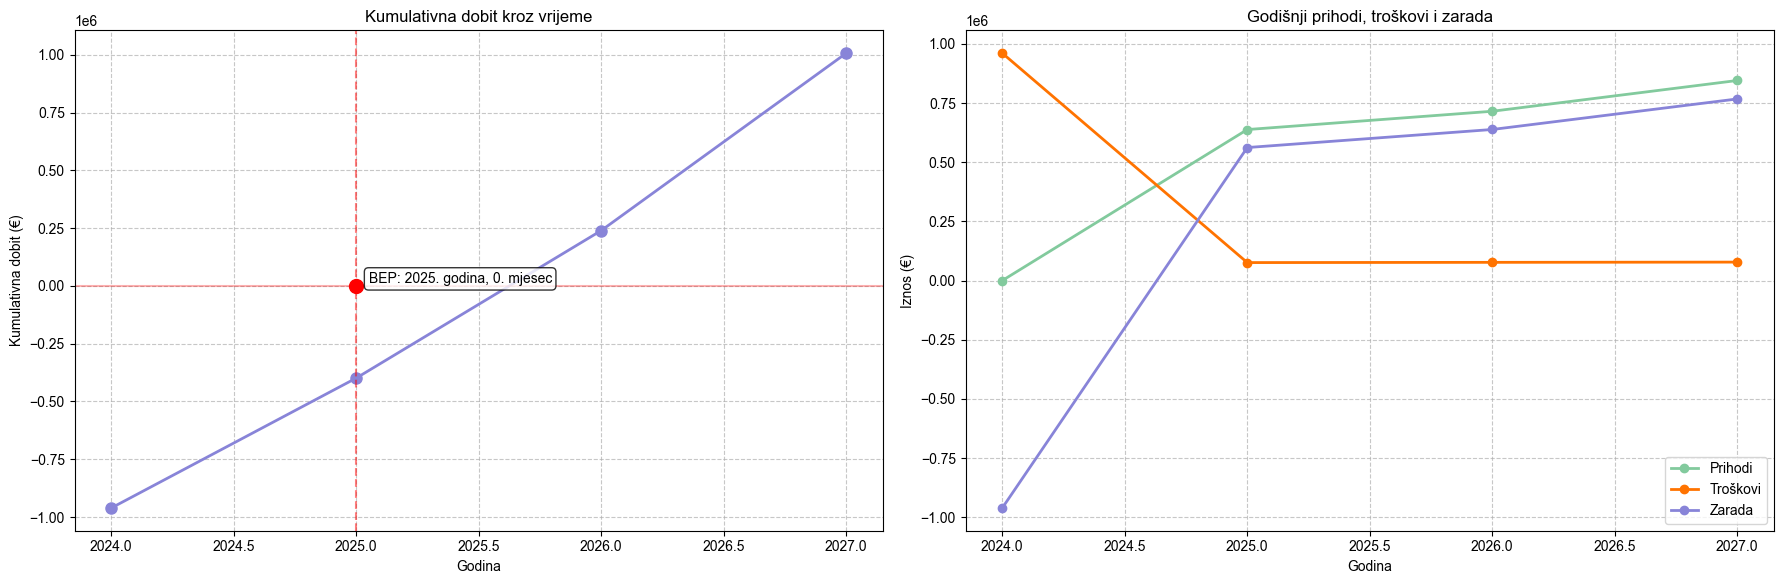

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 1. graf - Kumulativna dobit po godinama
ax1.plot(df_rezultati_po_godini['godina'], df_rezultati_po_godini['kumulativna_dobit'], 'o-', linewidth=2, markersize=8, color='#8884d8')
ax1.axhline(y=0, color='r', linestyle='-', alpha=0.3)

# Označi točku pokrića (BEP)
if rezultati['tocka_pokrica']:
    bep = rezultati['tocka_pokrica']
    if min(godine) <= bep <= max(godine):
        ax1.plot([bep], [0], 'ro', markersize=10)
        ax1.axvline(x=bep, color='r', linestyle='--', alpha=0.5)
        ax1.text(bep + 0.05, 0, f'BEP: {formatiraj_datum_tocke_pokrica(bep)}', verticalalignment='bottom', horizontalalignment='left', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax1.set_xlabel('Godina')
ax1.set_ylabel('Kumulativna dobit (€)')
ax1.set_title('Kumulativna dobit kroz vrijeme')
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. graf: Godišnji prihodi, troškovi i zarada
ax2.plot(df_rezultati_po_godini['godina'], df_rezultati_po_godini['prihod'], 'o-', linewidth=2, label='Prihodi', color='#82ca9d')
ax2.plot(df_rezultati_po_godini['godina'], df_rezultati_po_godini['ukupni_trosak'],'o-', linewidth=2, label='Troškovi', color='#ff7300')
ax2.plot(df_rezultati_po_godini['godina'], df_rezultati_po_godini['zarada'], 'o-', linewidth=2, label='Zarada', color='#8884d8')

ax2.set_xlabel('Godina')
ax2.set_ylabel('Iznos (€)')
ax2.set_title('Godišnji prihodi, troškovi i zarada')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)


plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.tight_layout()
plt.show()

#### Tablica s detaljnom analizom ekonomske izvedivosti ✅
Prikaz svih izračunatih vrijednosti u tablici:

In [11]:
ukupno = {
    'godina': 'Ukupno',
    'prihod': df_rezultati_po_godini['prihod'].sum(),
    'trosak_razvoja': df_rezultati_po_godini['trosak_razvoja'].sum(),
    'operativni_trosak': df_rezultati_po_godini['operativni_trosak'].sum(),
    'ukupni_trosak': df_rezultati_po_godini['ukupni_trosak'].sum(),
    'zarada': df_rezultati_po_godini['zarada'].sum(),
    'kumulativna_dobit': df_rezultati_po_godini['kumulativna_dobit'].iloc[-1]
}

df_tablica = pd.concat([df_rezultati_po_godini, pd.DataFrame([ukupno])], ignore_index=True)

df_stilizirano = df_tablica.style.format({
    'prihod': '{:,.2f} €',
    'trosak_razvoja': '{:,.2f} €',
    'operativni_trosak': '{:,.2f} €',
    'ukupni_trosak': '{:,.2f} €',
    'zarada': '{:,.2f} €',
    'kumulativna_dobit': '{:,.2f} €'
})

display(df_stilizirano)

,godina,prihod,trosak_razvoja,operativni_trosak,ukupni_trosak,zarada,kumulativna_dobit
0,2024,0.00 €,"960,800.00 €",0.00 €,"960,800.00 €","-960,800.00 €","-960,800.00 €"
1,2025,"638,000.00 €",0.00 €,"76,000.00 €","76,000.00 €","562,000.00 €","-398,800.00 €"
2,2026,"715,300.00 €",0.00 €,"77,000.00 €","77,000.00 €","638,300.00 €","239,500.00 €"
3,2027,"845,300.00 €",0.00 €,"78,000.00 €","78,000.00 €","767,300.00 €","1,006,800.00 €"
4,Ukupno,"2,198,600.00 €","960,800.00 €","231,000.00 €","1,191,800.00 €","1,006,800.00 €","1,006,800.00 €"


<br/>

### ❓ **Pitanja** - odgovoriti barem 5

1. Zašto je točka pokrića (BEP) važan pokazatelj rizika projekta?

Točka pokrića (Break-Even Point, BEP) označava razinu prihoda koja je potrebna da bi projekt počeo generirati dobit (kada su svi fiksni i varijabilni troškovi pokriveni). BEP je važan pokazatelj rizika jer pokazuje koliko je projekt osjetljiv na promjene u prihodima i troškovima. Ako projekt ne dosegne BEP, može dovesti do gubitaka. Dakle, što je BEP niži, to je projekt manje rizičan jer pokazuje da je manja količina prihoda potrebna za pokrivanje troškova.


2. Navedite jedan primjer materijalnog i jedan primjer nematerijalnog prihoda u IT projektima.

Materijalni prihod: Prihod od prodaje licenca za softver.

Nematerijalni prihod: Prihod od povećanja korisničke baze ili prihodi od usluga podrške korisnicima, koji nisu direktno povezani s fizičkim proizvodom.

3. Koji faktor više utječe na točku pokrića: povećanje prihoda ili smanjenje troškova?

Povećanje prihoda obično ima veći utjecaj na smanjenje BEP-a, jer svaki dodatni prihod izravno smanjuje broj prodaja potreban za pokriće troškova. Smanjenje troškova također smanjuje BEP, ali povećanje prihoda često omogućava brže postizanje profitabilnosti

4. Objasnite kako interpretirati negativnu vrijednost kumulativne dobiti.

Negativna kumulativna dobit znači da projekt do trenutnog razdoblja nije ostvario niti jedan neto dobitak. Ovaj pokazatelj ukazuje na to da projekt još nije pokrio svoje ukupne troškove, što može biti zabrinjavajuće, jer sugerira da će projekt možda trebati dodatna ulaganja kako bi postao isplativ.

5. Kako biste poboljšali ROI ovog projekta bez mijenjanja prihoda?

ROI (Return on Investment) se može poboljšati smanjenjem troškova. To uključuje optimizaciju poslovnih procesa, smanjenje nepotrebnih troškova, automatizaciju, ili smanjenje operativnih troškova. Time se povećava neto dobit, čime se poboljšava ROI bez potrebe za povećanjem prihoda.

6. Na temelju analiziranih podataka, je li ovaj projekt ekonomski isplativ? Zašto?

Da, projekt je ekonomski isplativ
ROI od 84.48% je iznimno visok
Projekt postiže točku pokrića brzo (već u 2025. godini)

7. Kako promjena vremenske vrijednosti novca (inflacija) utječe na procjenu isplativosti projekta?

Inflacija smanjuje stvarnu vrijednost novca tijekom vremena, pa projekt koji koristi buduće novčane tokove treba prilagoditi kako bi se odrazila smanjena kupovna moć tih budućih prihoda. Ovo se obično uzima u obzir u metodama poput diskontiranja novčanih tokova, što utječe na NPV i ROI projekata.

8. Usporedite ROI s ostalim metrikama poput NPV (neto sadašnje vrijednosti) - koja je glavna razlika?

ROI mjeri povrat na uloženi kapital, izraženo kao postotak.
NPV mjeri razliku između sadašnje vrijednosti budućih novčanih tokova i početne investicije, uzimajući u obzir vremensku vrijednost novca.
Glavna razlika je u tome što ROI ne uzima u obzir vremensku vrijednost novca, dok NPV daje bolju sliku stvarne isplativosti projekta, jer uključuje kako vrijeme utječe na novčane tokove.

9. Koje su potencijalne opasnosti oslanjanja isključivo na ROI pri donošenju odluka o projektima?

ROI ne uzima u obzir vremensku vrijednost novca, ni rizik povezan s projektom. Projekt s visokim ROI može izgledati atraktivno, ali ako se ostvaruje u daljoj budućnosti, može biti manje isplativ kada se uzme u obzir inflacija. Također, ROI ne razmatra neizravne troškove ili moguće rizike.

10. U kojoj godini projekt ostvaruje najveću godišnju zaradu i zašto?

2027.godina (767,300 €), vidljivo iz tablice

11. Kako bi produljenje trajanja projekta za još jednu godinu moglo utjecati na ukupnu isplativost?

Produljenje trajanja projekta može povećati troškove održavanja, administracije i operacija, što može smanjiti ukupnu isplativost, osim ako projekt također donosi dodatne prihode. Ako dodatna godina ne donosi proporcionalni prihod, ukupna isplativost može opasti.

12. Zašto je važno analizirati i kumulativnu dobit, a ne samo godišnju zaradu?

Kumulativna dobit daje širu sliku o ukupnoj isplativosti projekta kroz cijeli njegov vijek trajanja, dok godišnja zarada može biti promjenjiva. Analizom kumulativne dobiti razumijemo ukupnu vrijednost koju projekt donosi, a ne samo njegovu uspješnost u određenoj godini.

13. Koja je poveznica između ekonomske izvedivosti i tehničke izvedivosti projekta?

Ekonomska izvedivost ocjenjuje isplativost projekta, dok tehnička izvedivost ocjenjuje mogućnost realizacije projekta s obzirom na tehnologiju, resurse i stručnost. Projekti koji nisu tehnički izvedivi neće ostvariti predviđene ekonomske koristi, a oni koji nisu ekonomski izvedivi, iako tehnički mogu biti izvedivi, neće donijeti povrat na investiciju. Obje izvedivosti su ključne za uspjeh projekta.
